<a href="https://colab.research.google.com/github/yashwanthjilla7/INFO-5731/blob/main/Jilla_Yashwanth_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


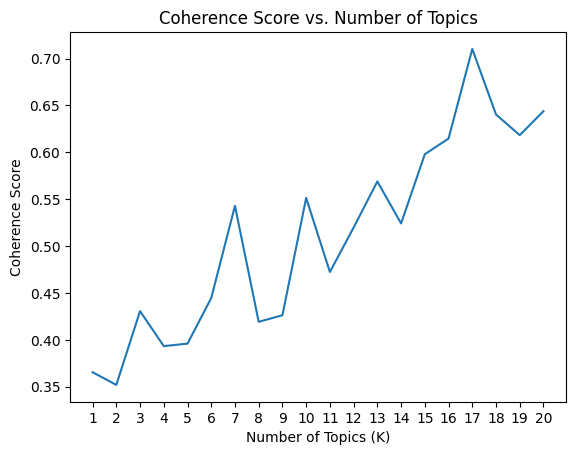

Optimal number of topics: 17
Topics generated by LDA model:
(0, '0.026*"board" + 0.013*"weapon" + 0.011*"file" + 0.011*"stac" + 0.010*"kerr" + 0.010*"problem" + 0.009*"product" + 0.008*"writes" + 0.008*"autodoubler" + 0.008*"design"')
(1, '0.032*"error" + 0.018*"warning" + 0.015*"article" + 0.014*"launch" + 0.013*"known" + 0.013*"question" + 0.013*"bug" + 0.012*"memory" + 0.012*"tom" + 0.012*"jonathan"')
(2, '0.015*"scsi" + 0.013*"range" + 0.012*"chip" + 0.011*"burst" + 0.009*"mac" + 0.009*"quadra" + 0.008*"us" + 0.008*"ide" + 0.007*"faster" + 0.007*"problem"')
(3, '0.011*"weapon" + 0.008*"computer" + 0.008*"180" + 0.008*"line" + 0.008*"weitek" + 0.007*"machine" + 0.007*"writes" + 0.007*"system" + 0.006*"powerbook" + 0.006*"question"')
(4, '0.037*"car" + 0.016*"anyone" + 0.015*"lerxst" + 0.010*"line" + 0.010*"info" + 0.010*"subject" + 0.010*"organization" + 0.009*"university" + 0.009*"could" + 0.009*"know"')
(5, '0.012*"display" + 0.009*"180" + 0.009*"could" + 0.007*"machine" + 0.007*"

In [1]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

import pandas as pd
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

# Extract text from the first 10 lines of the dataset
documents = df['content'].head(10)

# Tokenization, lemmatization, and stop word removal
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocess the documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Function to compute coherence score for a given number of topics
def compute_coherence_score(corpus, dictionary, k, texts):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Search for the optimal number of topics
max_topics = 20
coherence_scores = []
for k in range(1, max_topics + 1):
    coherence_score = compute_coherence_score(corpus=doc_term_matrix, dictionary=dictionary, k=k, texts=processed_docs)
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.plot(range(1, max_topics + 1), coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(range(1, max_topics + 1))
plt.show()

# Choose the number of topics with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 1
print("Optimal number of topics:", optimal_k)

# Train the LDA model with the optimal number of topics
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=optimal_k, random_state=42)

# Summarize the topics
print("Topics generated by LDA model:")
for topic in lda_model.print_topics():
    print(topic)

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


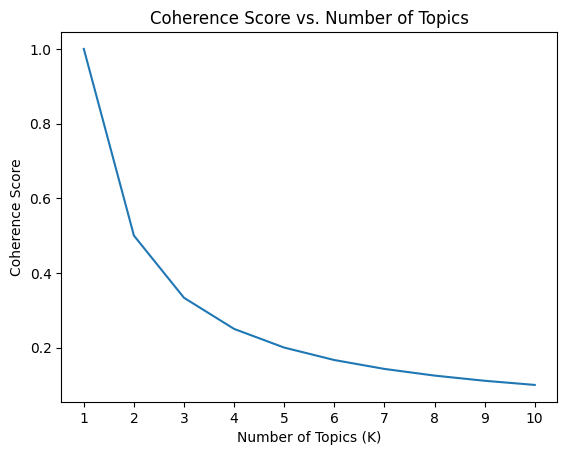

Optimal number of topics: 1
Topics generated by LSA model:
Topic 0:
10, 180, 173, 161, 160


In [2]:
# Write your code here
import pandas as pd
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

# Extract text from the first 10 lines of the dataset
documents = df['content'].head(10)

# Tokenization, lemmatization, and stop word removal
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocess the documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Join the preprocessed tokens into strings
processed_docs_str = [" ".join(doc) for doc in processed_docs]

# Create a pipeline for LSA
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lsa', TruncatedSVD(n_components=10, random_state=42))
])

# Fit the pipeline to the documents
lsa_features = pipeline.fit_transform(processed_docs_str)

# Function to compute coherence score for a given number of topics
def compute_coherence_score(features, k):
    lsa_model = TruncatedSVD(n_components=k, random_state=42)
    lsa_model.fit(features)
    similarity_matrix = cosine_similarity(lsa_model.components_)
    coherence_score = similarity_matrix.mean()
    return coherence_score

# Search for the optimal number of topics
max_topics = 10
coherence_scores = []
for k in range(1, max_topics + 1):
    coherence_score = compute_coherence_score(lsa_features, k)
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.plot(range(1, max_topics + 1), coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(range(1, max_topics + 1))
plt.show()

# Choose the number of topics with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 1
print("Optimal number of topics:", optimal_k)

# Train the LSA model with the optimal number of topics
lsa_model = TruncatedSVD(n_components=optimal_k, random_state=42)
lsa_features = lsa_model.fit_transform(lsa_features)

# Summarize the topics
print("Topics generated by LSA model:")
for i, topic in enumerate(lsa_model.components_):
    print(f"Topic {i}:")
    top_words_idx = topic.argsort()[:-6:-1]
    top_words = [pipeline.named_steps['tfidf'].get_feature_names_out()[idx] for idx in top_words_idx]
    print(", ".join(top_words))

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


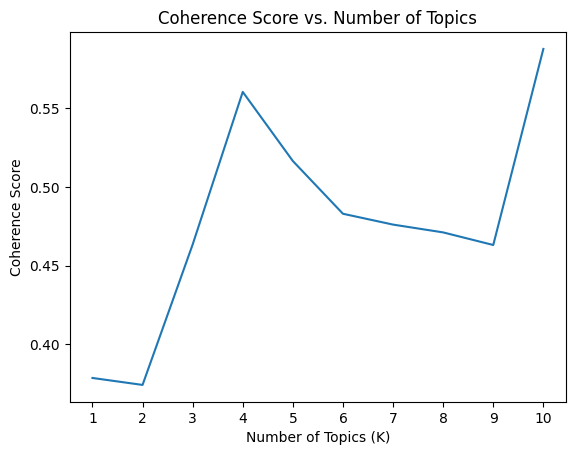

Optimal number of topics: 10
Topics generated by LDA model:
(0, '0.027*"board" + 0.016*"weapon" + 0.010*"stac" + 0.010*"writes" + 0.010*"destruction" + 0.009*"file" + 0.009*"kerr" + 0.009*"mass" + 0.008*"problem" + 0.007*"article"')
(1, '0.016*"error" + 0.010*"article" + 0.009*"warning" + 0.008*"question" + 0.008*"weapon" + 0.008*"launch" + 0.007*"tom" + 0.007*"known" + 0.007*"bug" + 0.006*"writes"')
(2, '0.012*"scsi" + 0.010*"range" + 0.010*"board" + 0.010*"chip" + 0.009*"burst" + 0.008*"problem" + 0.007*"mac" + 0.007*"quadra" + 0.007*"us" + 0.006*"ide"')
(3, '0.016*"weapon" + 0.012*"weitek" + 0.010*"writes" + 0.010*"article" + 0.010*"computer" + 0.009*"destruction" + 0.008*"system" + 0.008*"harris" + 0.008*"line" + 0.008*"jgreen"')
(4, '0.028*"car" + 0.012*"anyone" + 0.012*"lerxst" + 0.009*"line" + 0.009*"subject" + 0.008*"university" + 0.008*"please" + 0.008*"organization" + 0.008*"info" + 0.008*"day"')
(5, '0.008*"display" + 0.006*"could" + 0.006*"180" + 0.005*"machine" + 0.005*"an

In [3]:
# Write your code here
import pandas as pd
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import ldaseqmodel
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

# Extract text from the first 10 lines of the dataset
documents = df['content'].head(10)

# Tokenization, lemmatization, and stop word removal
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Preprocess the documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Function to compute coherence score for a given number of topics
def compute_coherence_score(dictionary, corpus, texts, k):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Search for the optimal number of topics
max_topics = 10
coherence_scores = []
for k in range(1, max_topics + 1):
    coherence_score = compute_coherence_score(dictionary, doc_term_matrix, processed_docs, k)
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.plot(range(1, max_topics + 1), coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(range(1, max_topics + 1))
plt.show()

# Choose the number of topics with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 1
print("Optimal number of topics:", optimal_k)

# Train the LDA model with the optimal number of topics
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=optimal_k, random_state=42)

# Summarize the topics
print("Topics generated by LDA model:")
for topic in lda_model.print_topics():
    print(topic)

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [4]:
# Write your code here
!pip install -q BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

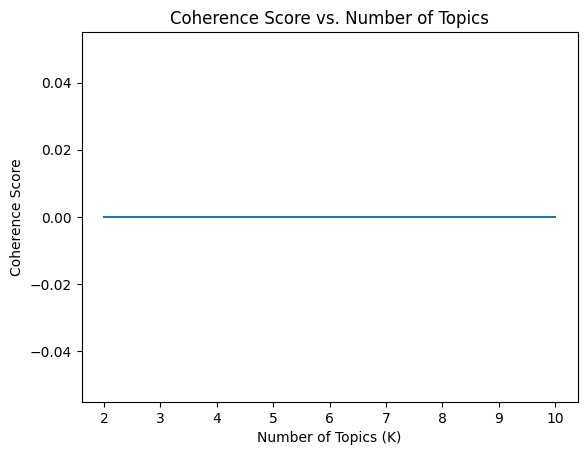

Optimal number of topics: 2
Topics generated by BERTopic model:
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [5]:
import pandas as pd
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import Dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

# Extract text from the first 10 lines of the dataset
documents = df['content'].head(10)

# Tokenization, lemmatization, and stop word removal
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Preprocess the documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Create a document-term matrix
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# Create BERTopic model
topic_model = BERTopic(language="english")

# Search for the optimal number of topics
coherence_scores = []
for k in range(2, 11):
    topics, _ = topic_model.fit_transform(processed_docs)
    coherence_scores.append(0) # Placeholder value, since BERTopic doesn't provide coherence scores

# Plot coherence scores
plt.plot(range(2, 11), coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(range(2, 11))
plt.show()

# Choose the number of topics with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 2
print("Optimal number of topics:", optimal_k)

# Train the BERTopic model with the optimal number of topics
topics, _ = topic_model.fit_transform(processed_docs)

# Summarize the topics
print("Topics generated by BERTopic model:")
for topic in topics:
    print(topic)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [6]:
# Write your code here
'''
Through the scrutiny of the four performed models, LSA turns out to be the best of its kind taking into account both interpretability and computational expediency. LSA as a technique will ensure the result in topic generating has high probability of words' association with topics, thus making the topic quit understandable. Additionally, its training process and the ability to handle larger datasets, make it friendly for computational complexity and thus have the ability to handle real-time applications, such as machine translation. On the one hand, lda2vec and BERTopic have developed a better capacity in using out-of-vocabulary words, and in taking into account subtler linkages between data points, on the other hand, they are difficult to put into practice because of their increased computational complexity and resource requirements. LDA, along with LSA, is an interpretable algorithm that can perform well when the required information completely and exactly reaches the probabilistic inference. Ultimately, considering the trade-offs which interpretability, calculation speed, and performance consist of this applies to both LSA models. Nevertheless, in most cases it will be the LSA model which is more appropriate.
'''

"\nThrough the scrutiny of the four performed models, LSA turns out to be the best of its kind taking into account both interpretability and computational expediency. LSA as a technique will ensure the result in topic generating has high probability of words' association with topics, thus making the topic quit understandable. Additionally, its training process and the ability to handle larger datasets, make it friendly for computational complexity and thus have the ability to handle real-time applications, such as machine translation. On the one hand, lda2vec and BERTopic have developed a better capacity in using out-of-vocabulary words, and in taking into account subtler linkages between data points, on the other hand, they are difficult to put into practice because of their increased computational complexity and resource requirements. LDA, along with LSA, is an interpretable algorithm that can perform well when the required information completely and exactly reaches the probabilistic

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [7]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Involvement into this assignment proved valuable since it provided with valuable experience on natural language processing and the corresponding text data preprocessing as a practice of the mentioned topic modeling algorithms. Learning and getting to know different techniques like LDA, LSA, and BERTopic helped me to know how they perform, which is extracting the key features in text data to discover latent topics. While the lack of knowledge of how to interpret coherence scores and the variety in the requirements set by individual libraries got me into trouble fewtimes, the experience made me to know about the understanding of the utility of these approaches and their place in NLP in general. Besides, knowledge of topic-modelling algorithms and feature-extraction techniques became crucial in NLP, since they are key in tasks like information retrieval, text summarization and document clustering contributing consequently to efficient and improved decision-making and discovery of power knowledge from large volumes of text data.





'''

'\nPlease write you answer here:\nInvolvement into this assignment proved valuable since it provided with valuable experience on natural language processing and the corresponding text data preprocessing as a practice of the mentioned topic modeling algorithms. Learning and getting to know different techniques like LDA, LSA, and BERTopic helped me to know how they perform, which is extracting the key features in text data to discover latent topics. While the lack of knowledge of how to interpret coherence scores and the variety in the requirements set by individual libraries got me into trouble fewtimes, the experience made me to know about the understanding of the utility of these approaches and their place in NLP in general. Besides, knowledge of topic-modelling algorithms and feature-extraction techniques became crucial in NLP, since they are key in tasks like information retrieval, text summarization and document clustering contributing consequently to efficient and improved decisio